In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel(r"C:\Users\we\Downloads\ABS+CF DATA POINTS ML (2).xlsx")

In [3]:
df.tail()

,Layer Thickness (mm),Raster Angle (degrees),Infill Density (%),Tensile Strength (MPa)
95,0.1,45,50,46.0
96,0.1,90,70,50.5
97,0.2,0,100,53.7
98,0.3,45,90,53.5
99,0.2,90,20,40.6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Layer Thickness (mm)    100 non-null    float64
 1   Raster Angle (degrees)  100 non-null    int64  
 2   Infill Density (%)      100 non-null    int64  
 3   Tensile Strength (MPa)  100 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [5]:
df.describe()

,Layer Thickness (mm),Raster Angle (degrees),Infill Density (%),Tensile Strength (MPa)
count,100.000000,100.000000,100.000000,100.000000
mean,0.174000,45.000000,63.500000,47.272000
std,0.076038,33.234703,26.756478,4.666668
min,0.100000,0.000000,20.000000,38.200000
25%,0.100000,0.000000,40.000000,44.025000
50%,0.200000,45.000000,60.000000,48.000000
75%,0.200000,90.000000,90.000000,51.600000
max,0.300000,90.000000,100.000000,53.700000


In [6]:
df.nunique().sort_values(ascending = False)

Tensile Strength (MPa)    83
Infill Density (%)         9
Layer Thickness (mm)       3
Raster Angle (degrees)     3
dtype: int64

In [7]:
target = pd.DataFrame(df['Tensile Strength (MPa)'])
feature = pd.DataFrame(df.drop(['Tensile Strength (MPa)'], axis = 1))

In [8]:
target

,Tensile Strength (MPa)
0,53.2
1,49.5
2,41.1
3,45.7
4,52.1
...,...
95,46.0
96,50.5
97,53.7
98,53.5


In [9]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.3, stratify= feature[["Infill Density (%)"]])

In [10]:
list_feature = [col for col in X_train.columns if X_train[col].dtype !='O']

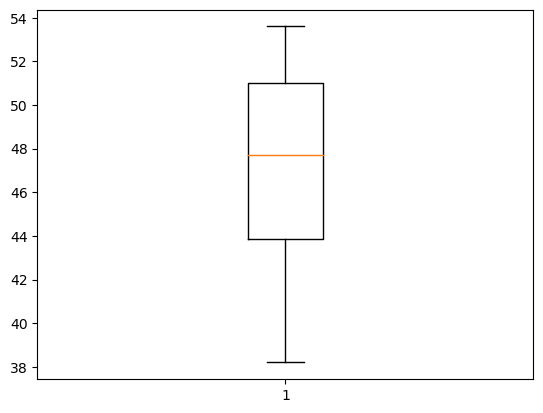

In [11]:
plt.boxplot(y_train['Tensile Strength (MPa)'])
plt.show()

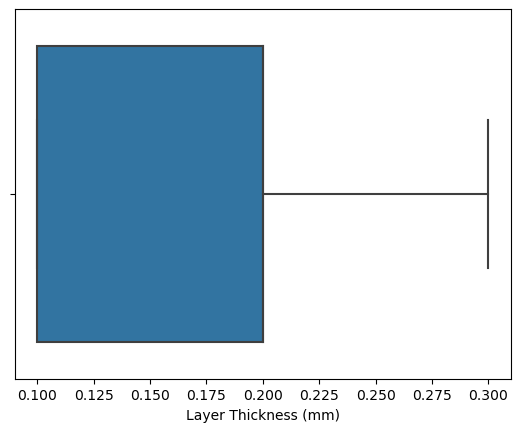

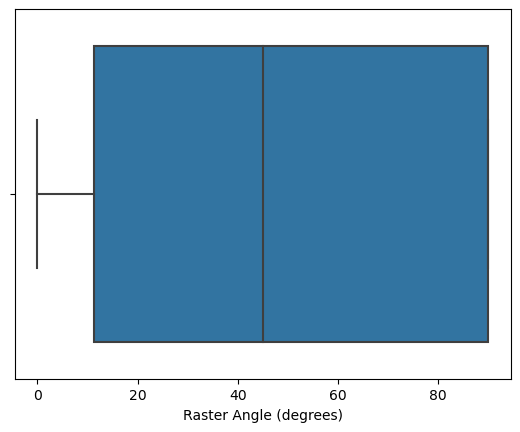

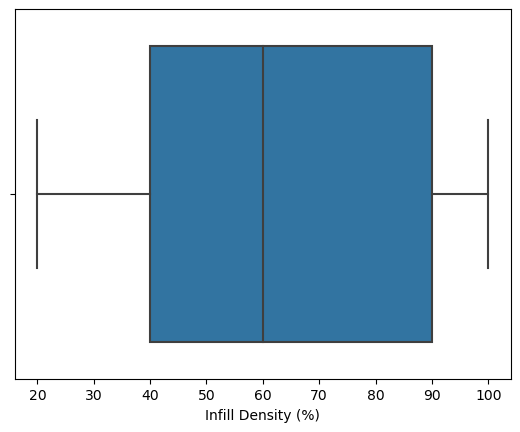

In [12]:
for i in list_feature:
    sns.boxplot(X_train[i])
    plt.show()

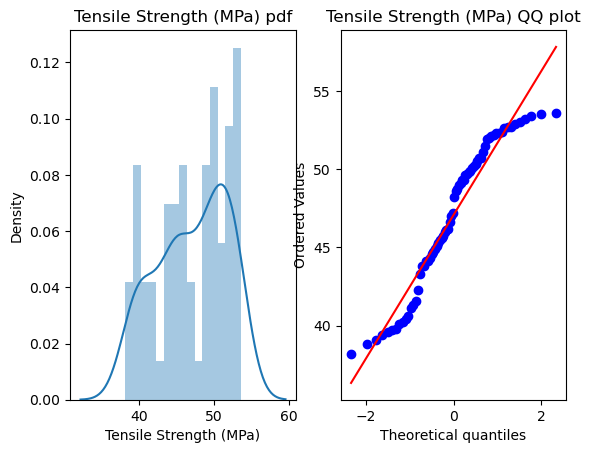

In [13]:
plt.subplot(121)
sns.distplot(x = y_train['Tensile Strength (MPa)'], kde = True, bins = 15)
plt.xlabel('Tensile Strength (MPa)')
plt.title('Tensile Strength (MPa)' + ' pdf')

plt.subplot(122)
stats.probplot(y_train['Tensile Strength (MPa)'], dist = 'norm', plot = plt)
plt.title('Tensile Strength (MPa)' + ' QQ plot')
plt.show()

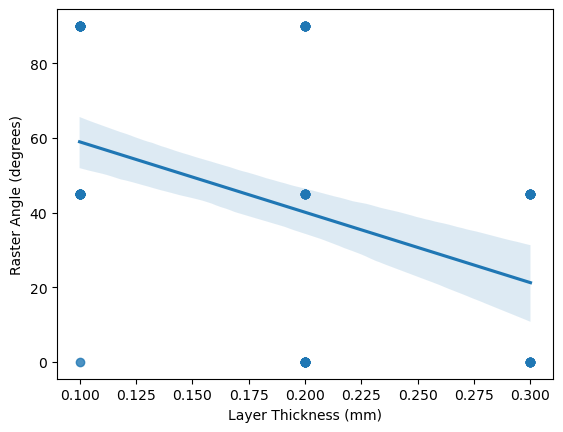

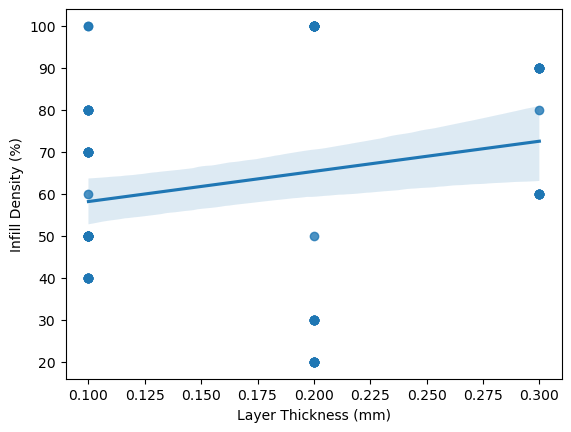

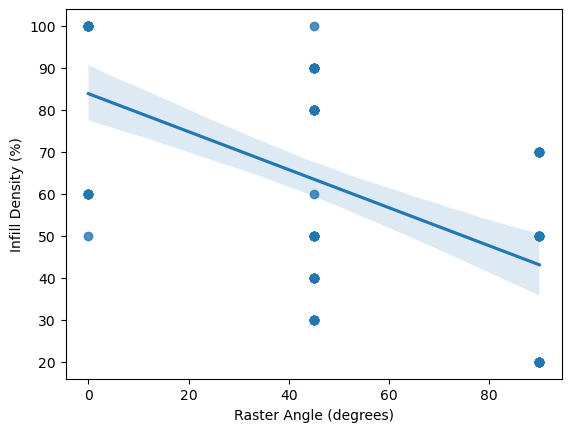

In [14]:
for i in range(len(list_feature)):
    for j in range(i+1, len(list_feature)):
        sns.regplot(x = feature[list_feature[i]], y = feature[list_feature[j]], scatter=True)
        plt.show()

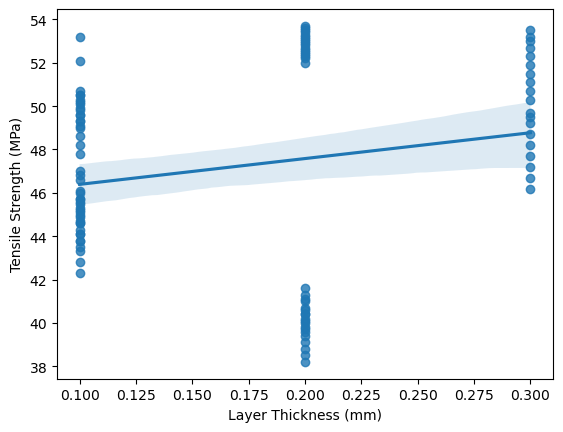

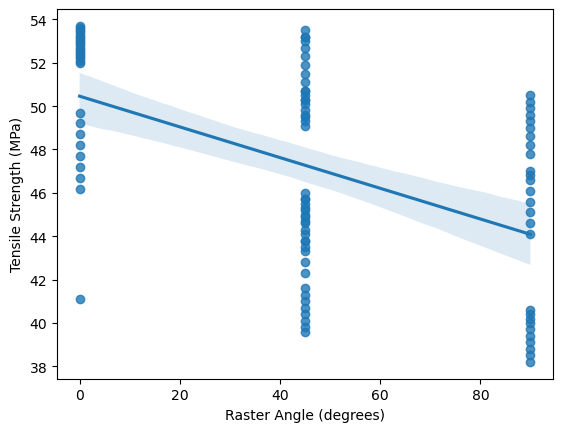

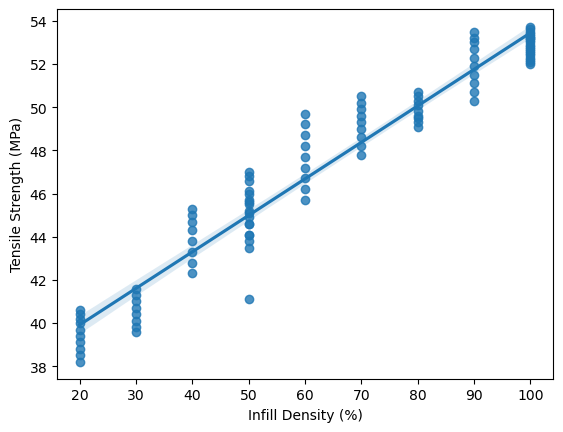

In [15]:
for i in range(len(list_feature)):
    sns.regplot(x = feature[list_feature[i]], y = target["Tensile Strength (MPa)"], scatter=True)
    plt.show()

In [16]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted, squared = True)
    rmse = mean_squared_error(true, predicted, squared = False)
    r2 = r2_score(true, predicted)
    return mae, mse, rmse, r2

Linear Regression:
Model performance on training set:
Train MAE: 0.8766
Train MSE: 1.2696
Train RMSE: 1.1268
Model R2 score: 0.9405


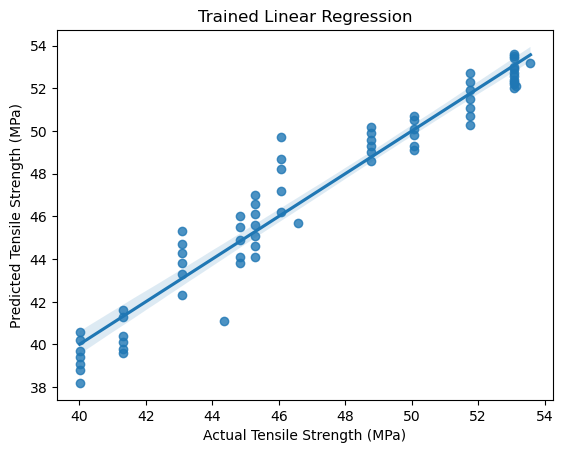

----------------------------------------
Model performance on test set:
Test MAE: 0.8499
Test MSE: 1.2292
Test RMSE: 1.1087
Model R2 score: 0.9436


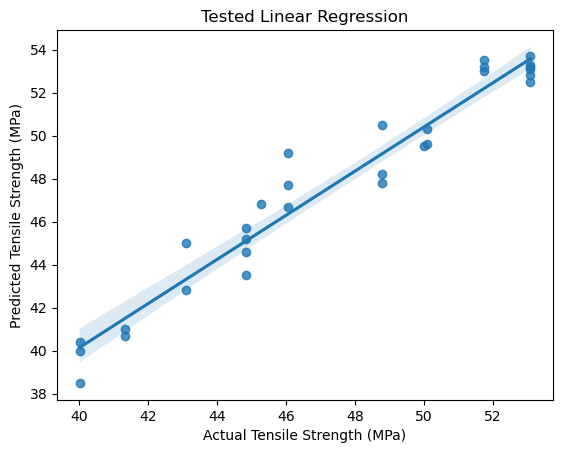

----------------------------------------


KNeighbors Regressor:
Model performance on training set:
Train MAE: 0.7549
Train MSE: 1.1582
Train RMSE: 1.0762
Model R2 score: 0.9457


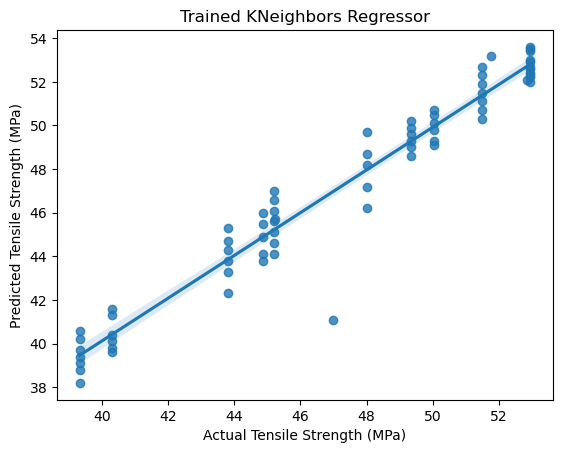

----------------------------------------
Model performance on test set:
Test MAE: 0.8480
Test MSE: 0.9866
Test RMSE: 0.9933
Model R2 score: 0.9547


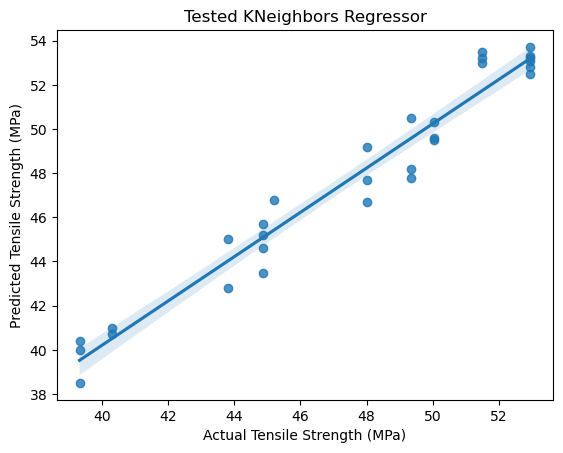

----------------------------------------


Support Vector Regressor:
Model performance on training set:
Train MAE: 1.0228
Train MSE: 1.8889
Train RMSE: 1.3744
Model R2 score: 0.9115


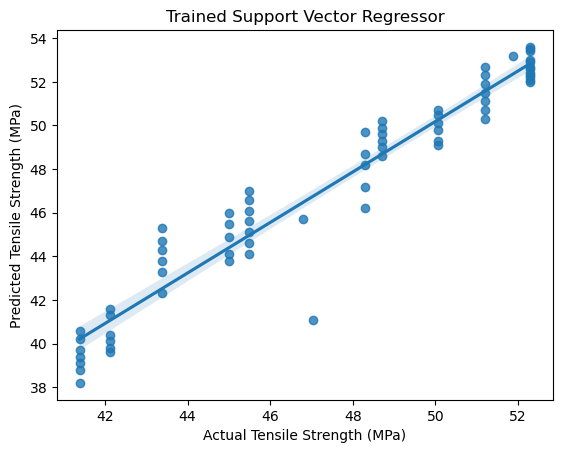

----------------------------------------
Model performance on test set:
Test MAE: 1.0855
Test MSE: 1.5978
Test RMSE: 1.2640
Model R2 score: 0.9266


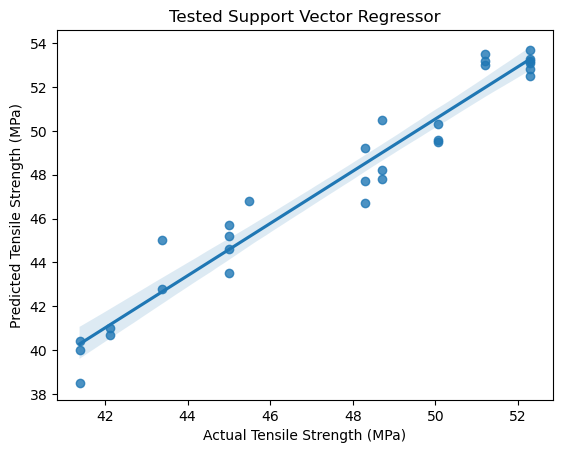

----------------------------------------


Random Forest Regressor:
Model performance on training set:
Train MAE: 0.6624
Train MSE: 0.6233
Train RMSE: 0.7895
Model R2 score: 0.9708


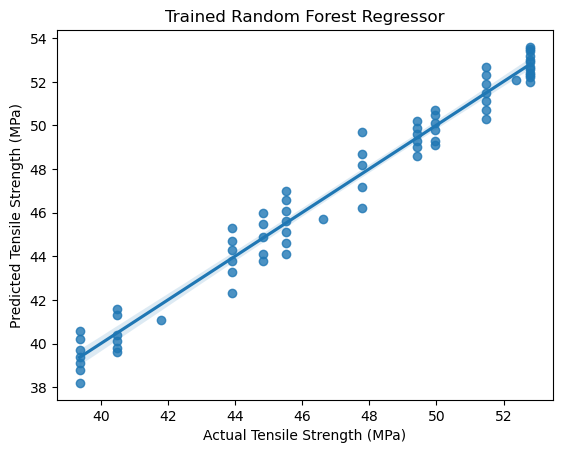

----------------------------------------
Model performance on test set:
Test MAE: 0.8286
Test MSE: 0.9651
Test RMSE: 0.9824
Model R2 score: 0.9557


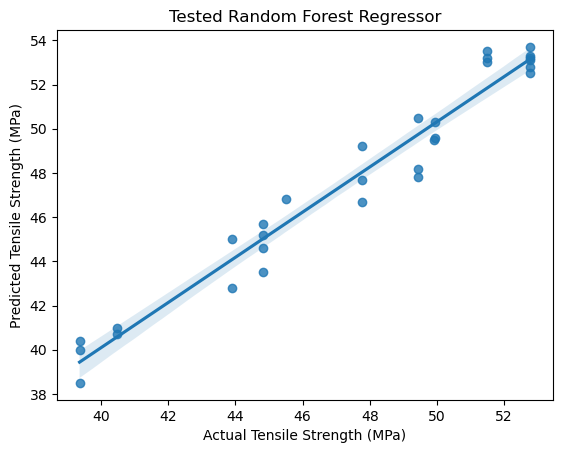

----------------------------------------


Decision Tree Regressor:
Model performance on training set:
Train MAE: 0.6243
Train MSE: 0.5960
Train RMSE: 0.7720
Model R2 score: 0.9721


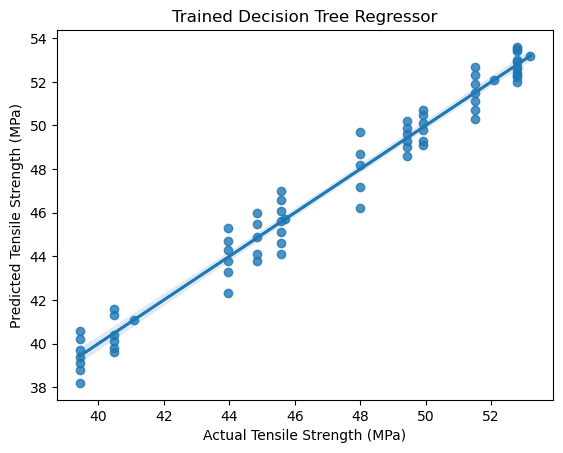

----------------------------------------
Model performance on test set:
Test MAE: 0.8325
Test MSE: 0.9561
Test RMSE: 0.9778
Model R2 score: 0.9561


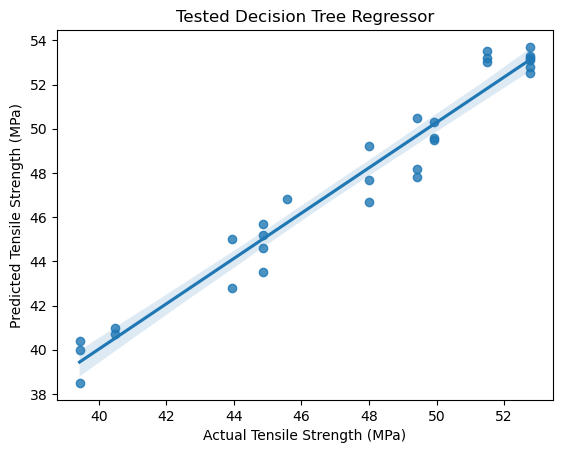

----------------------------------------




In [17]:
models = {
    "Linear Regression":LinearRegression(),
    "KNeighbors Regressor":KNeighborsRegressor(),
    "Support Vector Regressor":SVR(),
    "Random Forest Regressor":RandomForestRegressor(),
    "Decision Tree Regressor":DecisionTreeRegressor(),
}
model_mae_dic = dict()
model_mse_dic = dict()
model_rmse_dic = dict()
model_R2_score = dict()

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_mae = evaluate_model(y_train,y_train_pred)[0]
    test_mae = evaluate_model(y_test,y_test_pred)[0]
    train_mse = evaluate_model(y_train,y_train_pred)[1]
    test_mse = evaluate_model(y_test,y_test_pred)[1]
    train_rmse = evaluate_model(y_train,y_train_pred)[2]
    test_rmse = evaluate_model(y_test,y_test_pred)[2]
    train_R2_score = evaluate_model(y_train,y_train_pred)[3]
    test_R2_score = evaluate_model(y_test,y_test_pred)[3]
    
    print(list(models.keys())[i] + ":")
    model_mae_dic[(list(models.keys())[i])] = test_mae
    model_mse_dic[(list(models.keys())[i])] = test_mse
    model_rmse_dic[(list(models.keys())[i])] = test_rmse
    model_R2_score[(list(models.keys())[i])] = test_R2_score
    
    print('Model performance on training set:')
    print("Train MAE: {:.4f}".format(train_mae))
    print("Train MSE: {:.4f}".format(train_mse))
    print("Train RMSE: {:.4f}".format(train_rmse))
    print("Model R2 score: {:.4f}".format(train_R2_score))
    sns.regplot(y = y_train, x = y_train_pred)
    plt.title("Trained " + list(models.keys())[i])
    plt.xlabel("Actual Tensile Strength (MPa)")
    plt.ylabel("Predicted Tensile Strength (MPa)")
    plt.show()
    
    print("----------------------------------------")
    
    print('Model performance on test set:')
    print("Test MAE: {:.4f}".format(test_mae))
    print("Test MSE: {:.4f}".format(test_mse))
    print("Test RMSE: {:.4f}".format(test_rmse))
    print("Model R2 score: {:.4f}".format(test_R2_score))
    sns.regplot(y = y_test, x = y_test_pred)
    plt.title("Tested " + list(models.keys())[i])
    plt.xlabel("Actual Tensile Strength (MPa)")
    plt.ylabel("Predicted Tensile Strength (MPa)")
    plt.show()
    
    print("----------------------------------------")
#     print("Model R2 score: {:.4f}".format(R2_score))
    
    
    print("="*40)
    print('\n') 

In [18]:
model

DecisionTreeRegressor()

In [19]:
model.predict([[0.1, 45, 50]])

array([44.86])

In [20]:
import os

# Define the directory path
directory = 'D:\FYP'

# Check if the directory exists, if not, create it
if not os.path.exists(directory):
    os.makedirs(directory)

# Change the current working directory to the new directory
os.chdir(directory)

In [21]:
import pickle

In [22]:
model1 = RandomForestRegressor()
model1.fit(X_train, y_train)

RandomForestRegressor()

In [23]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model1, f)

In [24]:
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)